In [1]:
import pandas, numpy, seaborn, random

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':40, 'font.family':'FreeSans', 'xtick.labelsize':40, 'ytick.labelsize':40, 'figure.figsize':(16,8)})

In [2]:
data_file = '/home/adrian/gd15/hi/research/huvec/data/TEER/TEER measurements without blank - Sheet1.tsv'

# 1. read data

In [4]:
df = pandas.read_csv(data_file, sep='\t')
df

,ohms * cm2,replicate,condition,time
0,16.50,1,0 um cat,0
1,8.58,1,0 um cat,1
2,7.59,1,0 um cat,4
3,8.58,1,0 um cat,24
4,14.19,2,0 um cat,0
...,...,...,...,...
59,0.00,3,TNFa,24
60,15.84,4,TNFa,0
61,10.56,4,TNFa,1
62,7.92,4,TNFa,4


# 2. manipulate data

## 2.1. select control

In [4]:
treatment_labels = ['0 um cat', '0.5 um cat', '5 um cat', 'TNFa']
treatment_colors = ['black', 'orange', 'red', 'green']
time_points = [1, 4, 24]

In [5]:
plotting_values = []

for time_point in time_points:
    for i in range(len(treatment_labels)):  

        tl = treatment_labels[i]
        tc = treatment_colors[i]
        print(experiment_to_analyze, time_point, tl)

        reference = df[(df['condition'] == tl) & (df['time'] == 0)]
        sub = df[(df['Experiment'] == experiment_to_analyze) & (df['Treatment'] == tl) & (df['Timepoint (h)'] == time_point)]
        
        print(reference)
        print(sub)
        
        r = numpy.median(reference['TEER (Ohm*cm2)'].values)
        v = sub['TEER (Ohm*cm2)'].values
        print('values', r, v, numpy.mean(v))
        
        relative_values = v / r
        
        print('relative values', relative_values, numpy.mean(relative_values))
        
        label = str(tl) + '_' + str(time_point)
        plotting_values.append(relative_values)
    
        print('\n--------------------') 

68 1 EGM
     Replicate  Experiment Treatment  Timepoint (h)  Raw (ohm)  TEER (Ohm*cm2)
694          1          68       EGM            0.0        251           82.83
698          2          68       EGM            0.0        244           80.52
702          3          68       EGM            0.0        243           80.19
706          4          68       EGM            0.0        256           84.48
     Replicate  Experiment Treatment  Timepoint (h)  Raw (ohm)  TEER (Ohm*cm2)
695          1          68       EGM            1.0        227           74.91
699          2          68       EGM            1.0        227           74.91
703          3          68       EGM            1.0        226           74.58
707          4          68       EGM            1.0        228           75.24
values 81.675 [74.91 74.91 74.58 75.24] 74.91
relative values [0.91717172 0.91717172 0.91313131 0.92121212] 0.9171717171717171

--------------------
68 1 0.5 µM
     Replicate  Experiment Treatment  Ti

# plotting

[0.91717172 0.91717172 0.91313131 0.92121212] [0.8990099  0.8950495  0.92277228 0.8950495 ]
	 2 orange 4.0 0.15324608252079186
[0.91717172 0.91717172 0.91313131 0.92121212] [0.8460039  0.84210526 0.8460039  0.89278752]
	 3 tab:red 0.0 0.014214767999398257
		 SIGNIFICANT
[0.91717172 0.91717172 0.91313131 0.92121212] [0.90836653 0.90836653 0.89641434 0.93227092]
	 4 tab:green 4.0 0.15324608252079186
[0.90505051 0.9010101  0.8969697  0.89292929] [0.89108911 0.8990099  0.8990099  0.85940594]
	 10 orange 4.0 0.15471203018232949
[0.90505051 0.9010101  0.8969697  0.89292929] [0.83820663 0.85769981 0.82261209 0.82651072]
	 11 tab:red 0.0 0.015191410988288745
		 SIGNIFICANT
[0.90505051 0.9010101  0.8969697  0.89292929] [0.8685259  0.89243028 0.90039841 0.90039841]
	 12 tab:green 4.0 0.15471203018232949
[0.91717172 0.87272727 0.89292929 0.88484848] [0.87920792 0.87920792 0.85940594 0.85544554]
	 18 orange 2.0 0.055105091336710564
[0.91717172 0.87272727 0.89292929 0.88484848] [0.84990253 0.834307

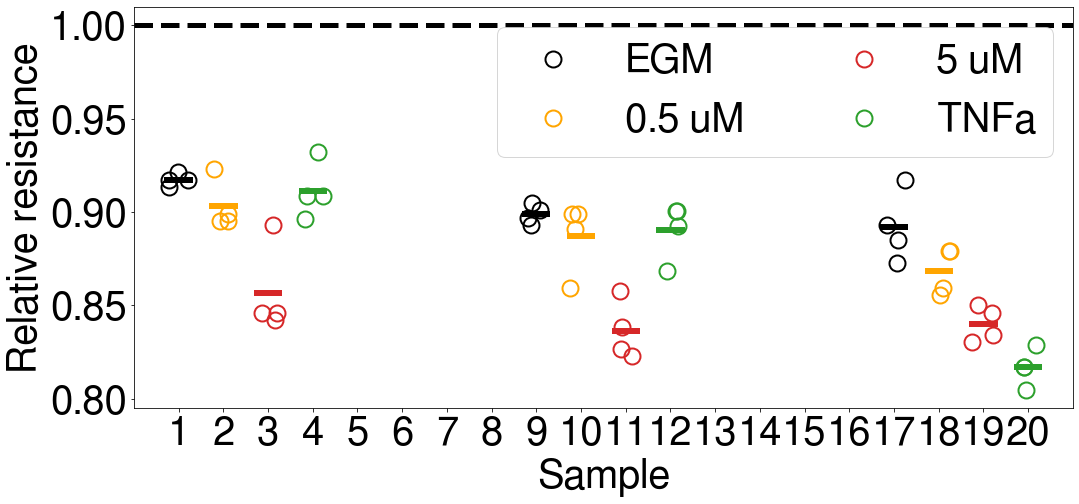

<Figure size 1152x576 with 0 Axes>

In [6]:
plotting_colors = ['black', 'orange', 'tab:red', 'tab:green', 'black', 'orange', 'tab:red', 'tab:green', 'black', 'orange', 'tab:red', 'tab:green']
epsi = 0.25
pos = 0
wide = epsi*2

matplotlib.pyplot.axhline(y=1, color='black', ls='--', lw=5)

for i in range(len(plotting_values)):
    pos = pos + 1
    
    # mean values
    mean = numpy.mean(plotting_values[i])
    matplotlib.pyplot.plot([pos-epsi, pos+epsi], [mean, mean], '-', color=plotting_colors[i], lw=6, zorder=999)
    
    # dot plots
    for element in plotting_values[i]:
        random_pos = (pos-epsi) + random.random()*wide
        matplotlib.pyplot.plot(random_pos, element, 'o', markersize=16, markerfacecolor='None', markeredgewidth=2, markeredgecolor=plotting_colors[i])
        
    # closing
    matplotlib.pyplot.xticks(numpy.arange(1, 20+1))
    
    # hypothesis testing
    if plotting_colors[i] == 'black':
        background = plotting_values[i]

    if plotting_colors[i] != 'black':
        print(background, plotting_values[i])
        umws, pvalue = scipy.stats.mannwhitneyu(background, plotting_values[i])   
        print('\t', pos, plotting_colors[i], umws, pvalue)
        if pvalue < 0.01:
            print('\t\t VERY')
        if pvalue < 0.05:
            print('\t\t SIGNIFICANT')
    
    # adjust the blocks
    if (i+1)%4 == 0:
        pos = pos + 4

# legend
matplotlib.pyplot.plot(-1, 0.95, 'o', markersize=16, markerfacecolor='None', markeredgewidth=2, markeredgecolor='black', label='EGM')
matplotlib.pyplot.plot(-1, 0.95, 'o', markersize=16, markerfacecolor='None', markeredgewidth=2, markeredgecolor='orange', label='0.5 uM')
matplotlib.pyplot.plot(-1, 0.95, 'o', markersize=16, markerfacecolor='None', markeredgewidth=2, markeredgecolor='tab:red', label='5 uM')
matplotlib.pyplot.plot(-1, 0.95, 'o', markersize=16, markerfacecolor='None', markeredgewidth=2, markeredgecolor='tab:green', label='TNFa')

matplotlib.pyplot.legend(loc=1, ncol=2)

matplotlib.pyplot.xlim(0, 21)

# end
matplotlib.pyplot.xlabel('Sample')
matplotlib.pyplot.ylabel('Relative resistance')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()
matplotlib.pyplot.savefig('permeability.svg')
matplotlib.pyplot.clf()